# Stroke Risk Prediction and Data Visualization with Machine Learning

# Introduction

A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off.

# Content:
- Load and Review the Data Set
- Data Vislization
- Data Preprocessing & Variables types adjustment
- Fix The Imbalance
- MODELS

   1- Random Forest with optimization for the Tuning Parameter
   
   2- Random Forest without optimization for the Tuning Parameter
   
   3-Classification And Regression Tree (CART) 
   
   4-SVM with optimal parameters
   
   5-Unoptimized SVM Model 
   
   6-Logistic Regression
   
   7-Perceptron
  
  
- Creation of Prediction Funtion
- Artificial Patients Profiles for Prection Function
- Stroke Risk Prediction of Patients

In [ ]:
 """"
  class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None,
  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
  ccp_alpha=0.0, max_samples=None)[source]
  
  rf_params = {"max_depth": [10,20,30],
            "max_features": ['auto','sqrt'],
            "n_estimators": [200,400,600],
            "min_samples_split": [2,5,10]}
  
  
 class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
 max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
 class_weight=None, ccp_alpha=0.0)[source]
 
 class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
 probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, 
 decision_function_shape='ovr', break_ties=False, random_state=None)[source]
 
 param_grid = [
    {
       'C':[0.5,1,10,100],
        'gamma':['scale',1, 0.1, 0.01, 0.001, 0.0001],
        'kernel':['rbf'] # ['rbf','poly','linear']
    }

 class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, 
 fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None,
 solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, 
 l1_ratio=None)[source]
 
 class sklearn.linear_model.Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
 max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, 
 validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)[source]
 
 
"""

# Load And Review The DataSet

In [1]:
#General Libraries
import numpy as np
import pandas as pd 

# Statistic & Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,OrdinalEncoder,LabelBinarizer
from sklearn.utils import resample
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Data Visualiztion Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

from warnings import filterwarnings
filterwarnings('ignore')

# Load The Data

In [2]:
df = pd.read_csv (r'E:\Second Year--Aveiro\Machine Learning\Project\Mohamed\healthcare-dataset-stroke-data.csv', sep=',')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
#information about the DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#to check the total null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#remove the null values
df = df.dropna()

In [6]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
#to get the statistic data
df.describe().T

count          mean           std    min       25%  \
id                 4909.0  37064.313506  20995.098457  77.00  18605.00   
age                4909.0     42.865374     22.555115   0.08     25.00   
hypertension       4909.0      0.091872      0.288875   0.00      0.00   
heart_disease      4909.0      0.049501      0.216934   0.00      0.00   
avg_glucose_level  4909.0    105.305150     44.424341  55.12     77.07   
bmi                4909.0     28.893237      7.854067  10.30     23.50   
stroke             4909.0      0.042575      0.201917   0.00      0.00   

                        50%       75%       max  
id                 37608.00  55220.00  72940.00  
age                   44.00     60.00     82.00  
hypertension           0.00      0.00      1.00  
heart_disease          0.00      0.00      1.00  
avg_glucose_level     91.68    113.57    271.74  
bmi                   28.10     33.10     97.60  
stroke                 0.00      0.00      1.00

# Data Vislization

<AxesSubplot:>

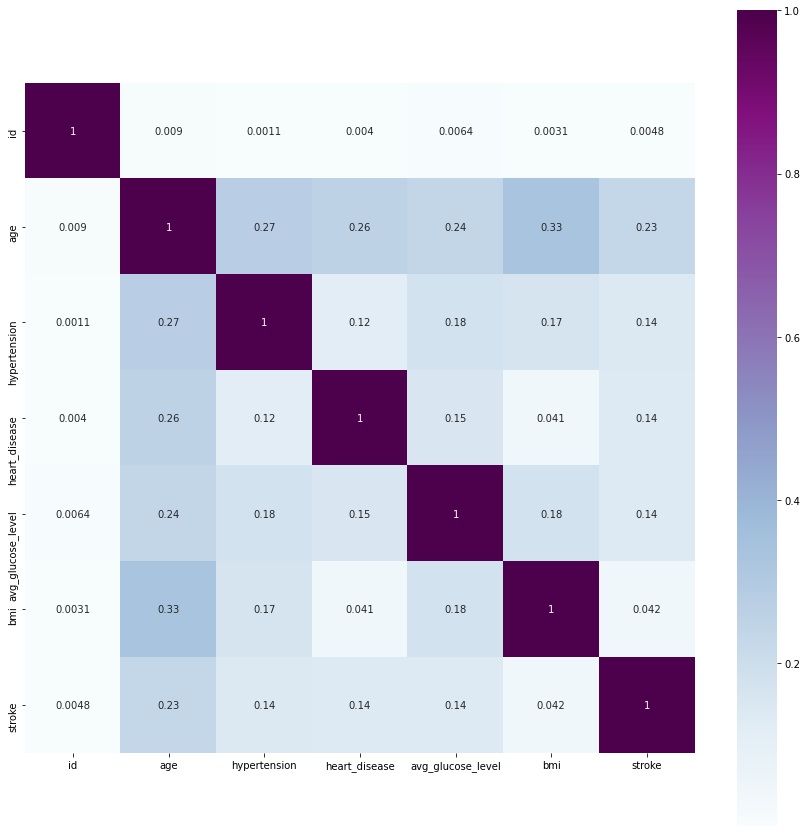

In [8]:
# Making a correlation plot - very interesting that there are no correlation between features
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), cmap='BuPu',square=True,annot=True, annot_kws={"size":10})

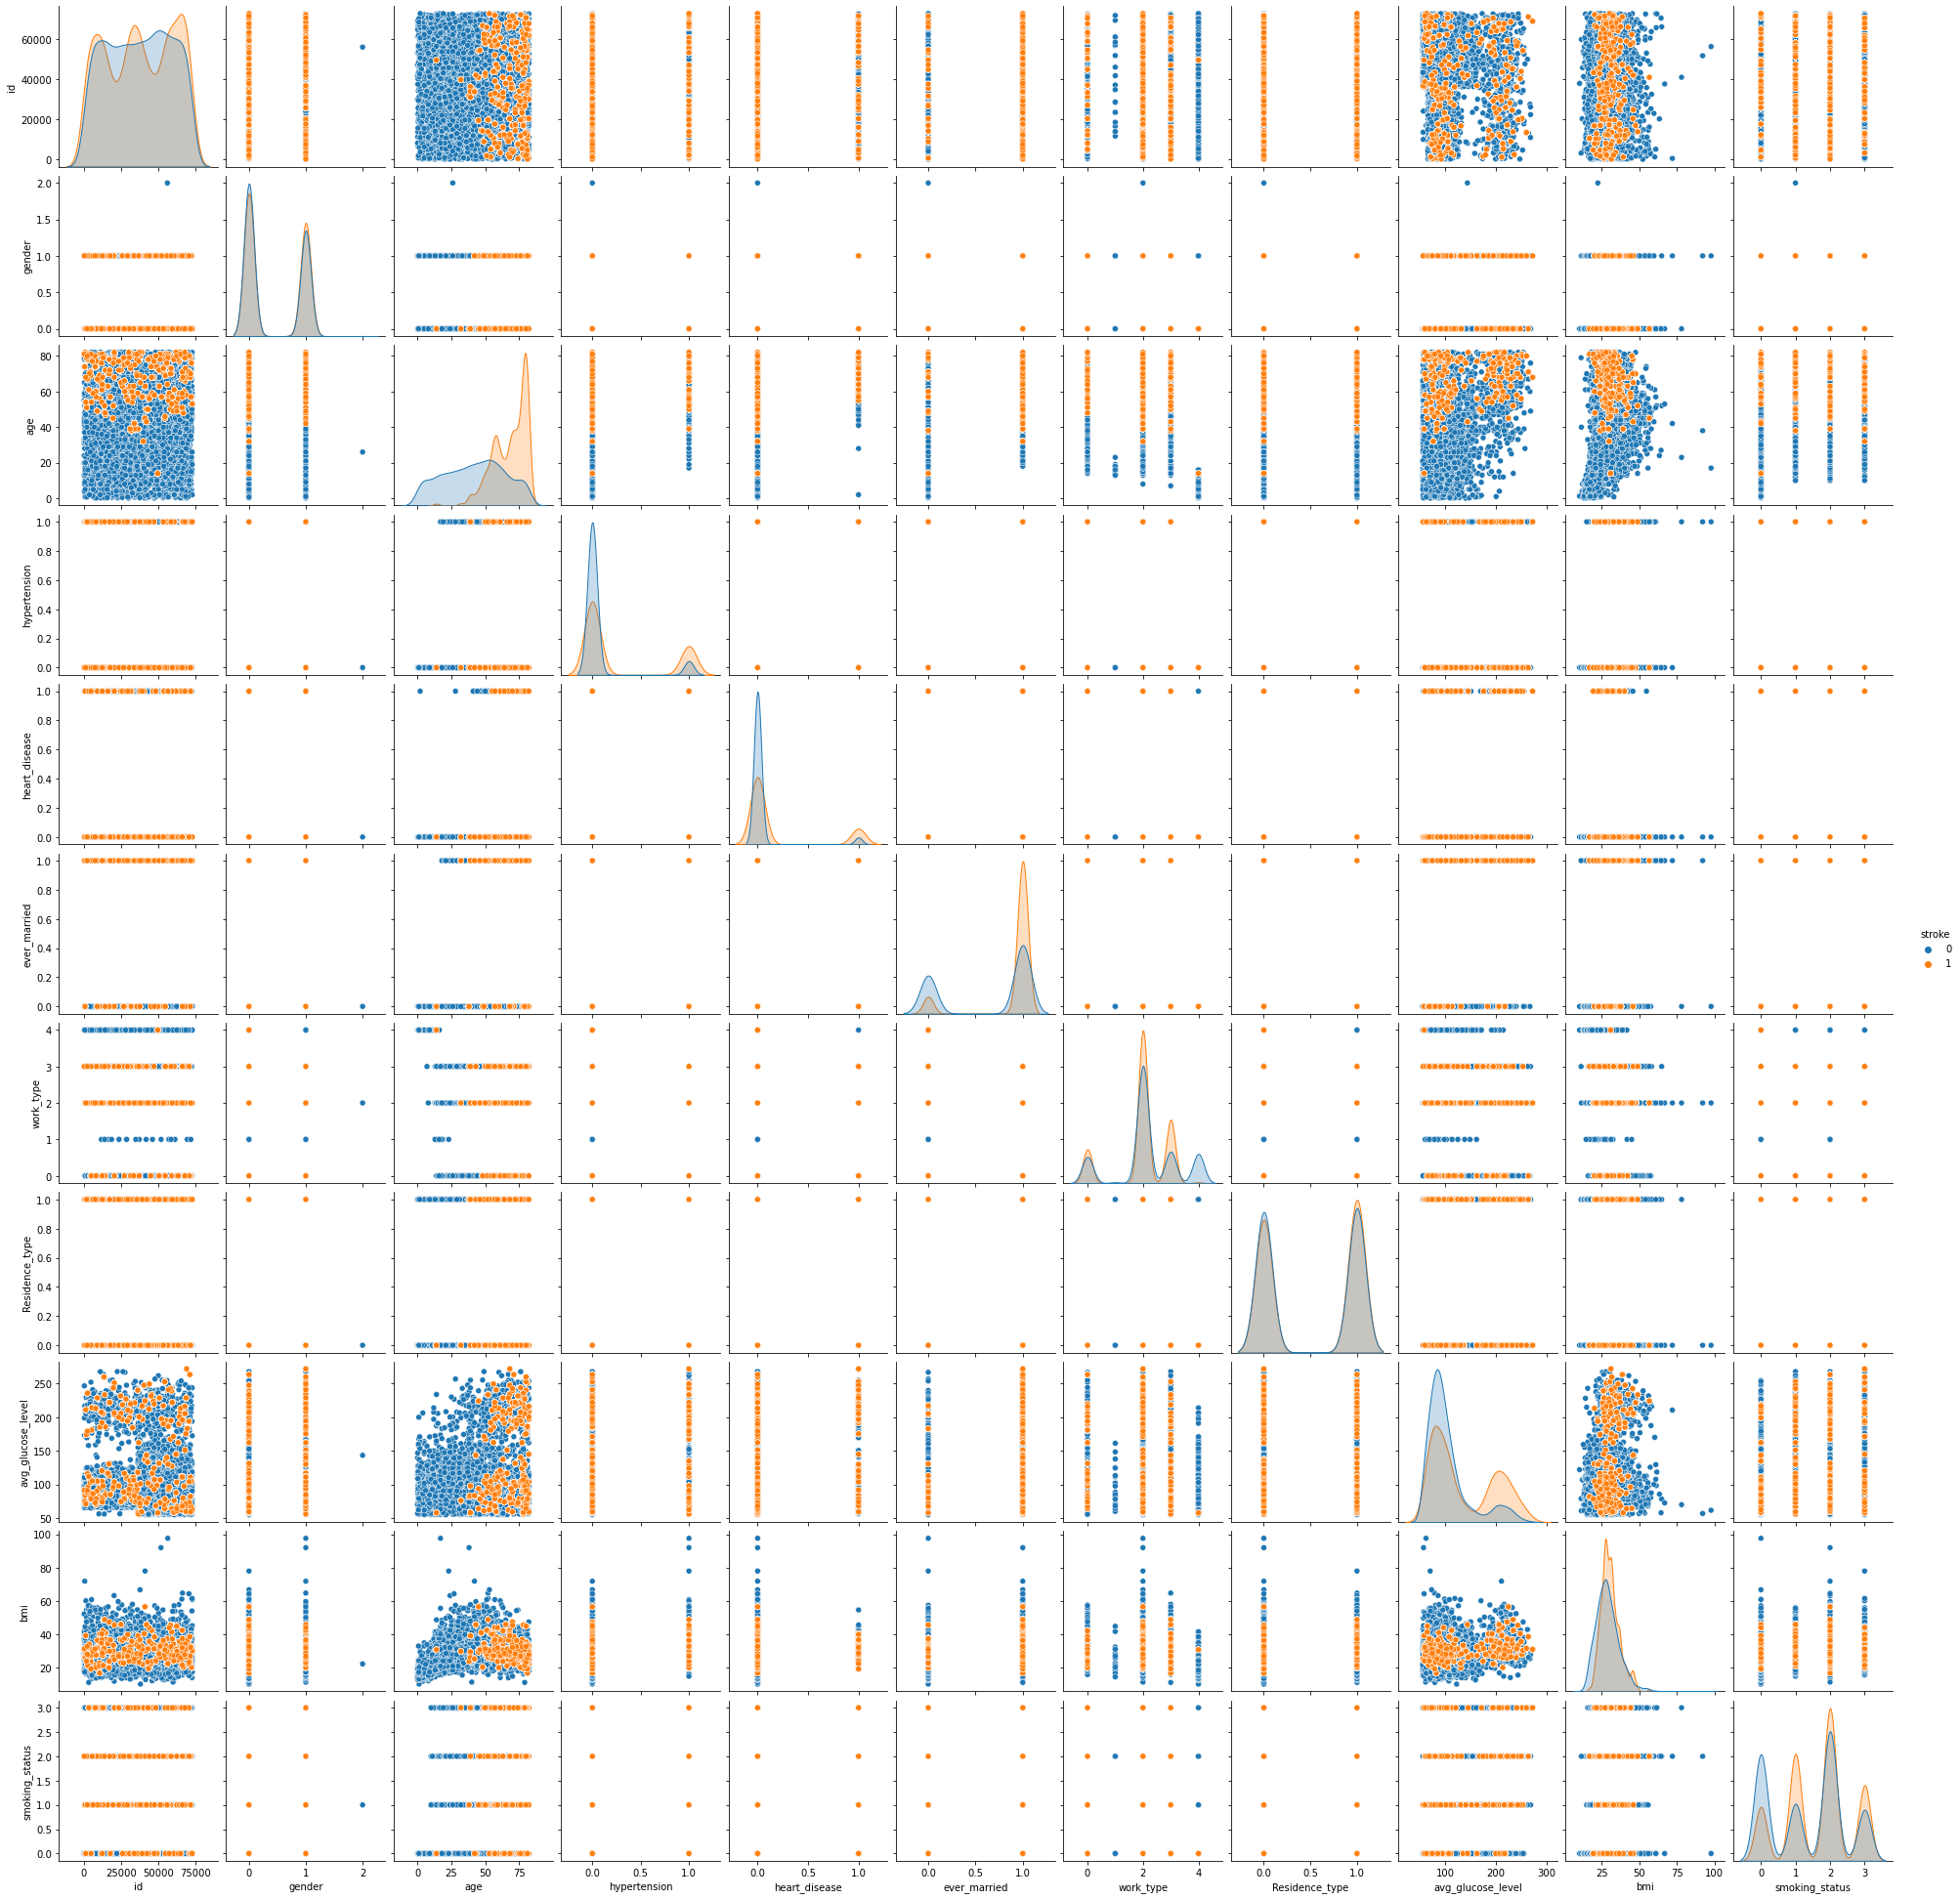

In [32]:
#this to indicate the relation between every single pairs in the dataset
sns.pairplot(df,hue='stroke')
plt.show()

0    4700
1     209
Name: stroke, dtype: int64

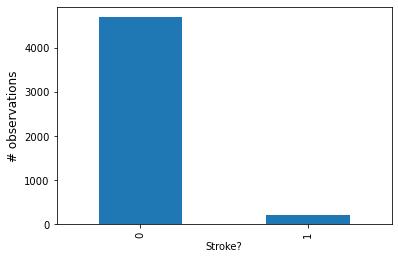

In [20]:
# Visualizing the Smoker feature - imbalanced data set
df['stroke'].value_counts().plot(kind='bar')
plt.ylabel("# observations", fontsize = 12)
plt.xlabel('Stroke?')
df.stroke.value_counts()

* It is very clear that this data set isn't balance so, we are going to resample to solve this problem

# Data Preprocessing & Variables types adjustment
This data set has a lot of values which need to be numerical instead of categorical form

In [9]:
y = df["stroke"] #Dependent variable
X = df.drop(["stroke"], axis=1) #Independent variable

In [10]:
# Converting the categorical target variable to numerical
cat_transformer = OrdinalEncoder()
cat_features = ["gender", "ever_married", "work_type", "Residence_type","smoking_status"]
transformed_cat = cat_transformer.fit_transform(df[cat_features])
df[cat_features] = transformed_cat
df.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046     1.0  67.0             0              1           1.0        2.0   
2  31112     1.0  80.0             0              1           1.0        2.0   
3  60182     0.0  49.0             0              0           1.0        2.0   
4   1665     0.0  79.0             1              0           1.0        3.0   
5  56669     1.0  81.0             0              0           1.0        2.0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0             1.0             228.69  36.6             1.0       1  
2             0.0             105.92  32.5             2.0       1  
3             1.0             171.23  34.4             3.0       1  
4             0.0             174.12  24.0             2.0       1  
5             1.0             186.21  29.0             1.0       1

# Fix The Imbalance

In [11]:
# Fix the imbalance problem
# Separate majority and minority classes

df_maj = df[df.stroke==0]
df_min = df[df.stroke==1]
 
# Upsample minority class
df_min_upsampled = resample(df_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=4700,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df_maj, df_min_upsampled])
 
# Display new class counts
df.stroke.value_counts()

1    4700
0    4700
Name: stroke, dtype: int64

In [12]:
# we  are going to normalize the data and then split the training and test data set
min_max_scaler = preprocessing.MinMaxScaler()
X = df.drop(["stroke"],axis=1) 
Y = df["stroke"]
X_minmax = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_minmax, Y, test_size=0.2, random_state=42)


# MODELS 

## Build Random Forest

# Random Forest with optimization for the Tuning Parameter

In [33]:
#Model Tuniing

rf_params = {"max_depth": [10,20,30],
            "max_features": ['auto','sqrt'],
            "n_estimators": [200,400,600],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

rf_cv_model.fit(X_train, y_train)
print("The Best Parameters: " + str(rf_cv_model.best_params_))

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 20.2min finished


The Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 400}


In [35]:
rf_tuned = RandomForestClassifier(max_depth = 30, 
                                  max_features = 'sqrt', 
                                  min_samples_split = 2,
                                  n_estimators = 200)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=200)

In [36]:
y_pred_tuned = rf_tuned.predict(X_test)
crosscore_rf=accuracy_score(y_test, y_pred_tuned)
testscore_rf=accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {testscore_rf*100}%")

Accuracy: 99.68085106382979%


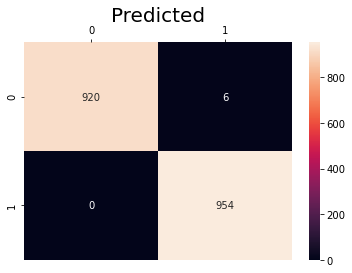

In [37]:
co_rf_tuned = confusion_matrix(y_true=y_test, y_pred=y_pred_tuned)
ax= plt.subplot()
sns.heatmap(co_rf_tuned, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 

ax.xaxis.tick_top()

In [38]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       926
           1       0.99      1.00      1.00       954

    accuracy                           1.00      1880
   macro avg       1.00      1.00      1.00      1880
weighted avg       1.00      1.00      1.00      1880



# Random Forest without optimization for the Tuning Parameter

In [39]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
testscore_rf=accuracy_score(y_test, y_pred)
testscore_rf_model=accuracy_score(y_test, y_pred)
print(f"Accuracy: {testscore_rf_model*100}%")

Accuracy: 99.7340425531915%


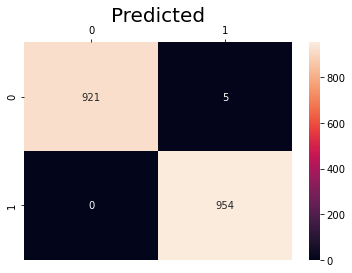

In [40]:
co_RF = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax= plt.subplot()
sns.heatmap(co_RF, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 

ax.xaxis.tick_top()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       926
           1       0.99      1.00      1.00       954

    accuracy                           1.00      1880
   macro avg       1.00      1.00      1.00      1880
weighted avg       1.00      1.00      1.00      1880



# Classification And Regression Tree (CART) 


In [44]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [45]:
y_pred_Cart = cart_model.predict(X_test)
testscore_cart=accuracy_score(y_test, y_pred_Cart)
testscore_Cart=accuracy_score(y_test, y_pred_Cart)
print(f"Accuracy: {testscore_Cart*100}%")

Accuracy: 98.08510638297872%


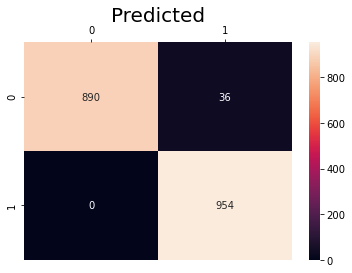

In [46]:
co_cart = confusion_matrix(y_true=y_test, y_pred=y_pred_Cart)
ax= plt.subplot()
sns.heatmap(co_cart, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 

ax.xaxis.tick_top()

In [47]:
print(classification_report(y_test, y_pred_Cart))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       926
           1       0.96      1.00      0.98       954

    accuracy                           0.98      1880
   macro avg       0.98      0.98      0.98      1880
weighted avg       0.98      0.98      0.98      1880



# Support Vector Machine (SVM)

# 1- SVM with optimal parameters:

In [48]:
param_grid = [
    {
       'C':[0.5,1,10,100],
        'gamma':['scale',1, 0.1, 0.01, 0.001, 0.0001],
        'kernel':['rbf'] # ['rbf','poly','linear']
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

%time C,g,k = optimal_params.fit(X_train, y_train).best_params_.values()

Wall time: 5min 23s


In [50]:
print(f"C = {C}")
print(f"gamma = {g}")
print(f"kernel = {k}")

C = 100
gamma = 1
kernel = rbf


In [51]:
clf_svm = SVC(random_state=42, C=100, gamma=1, kernel='rbf')
clf_svm.fit(X_train, y_train)

SVC(C=100, gamma=1, random_state=42)

In [52]:
y_pred_SVC = clf_svm .predict(X_test)
testscore_nonsvm=accuracy_score(y_test, y_pred_SVC) 
testscore_SVC=accuracy_score(y_test, y_pred_SVC) 
print(f"Accuracy: {testscore_SVC*100}%")

Accuracy: 94.14893617021278%


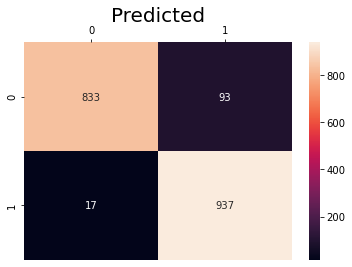

In [52]:
co_svm = confusion_matrix(y_true=y_test, y_pred=y_pred_SVC)
ax= plt.subplot()
sns.heatmap(co_svm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 

ax.xaxis.tick_top()

In [53]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       926
           1       0.91      0.98      0.94       954

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



# 2- Unoptimized SVM Model :

In [19]:
clf_svm_unoptimized = SVC(random_state=42)
clf_svm_unoptimized.fit(X_train, y_train)

SVC(random_state=42)

In [55]:
preds_unoptimized = clf_svm_unoptimized.predict(X_test)
testscore_SVC_unoptimized=accuracy_score(y_test,preds_unoptimized)
print(f"Accuracy: {testscore_SVC_unoptimized*100}%")

Accuracy: 80.95744680851064%


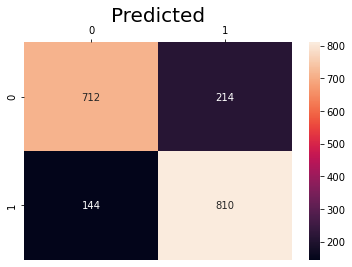

In [21]:
co_svm_unoptimized = confusion_matrix(y_true=y_test, y_pred=preds_unoptimized)
ax= plt.subplot()
sns.heatmap(co_svm_unoptimized, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 

ax.xaxis.tick_top()

In [56]:
print(classification_report(y_test, preds_unoptimized))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       926
           1       0.79      0.85      0.82       954

    accuracy                           0.81      1880
   macro avg       0.81      0.81      0.81      1880
weighted avg       0.81      0.81      0.81      1880



* Note:
    
    It is very Clear that the model performance improved after choosing the tuning parameter in SVM

# Logistic Regression

In [57]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
testscore_log_reg = accuracy_score(predictions, y_test)
print(f"LogisticRegression: {testscore_log_reg*100}%")


LogisticRegression: 76.59574468085107%


In [60]:
crosscore_lr =cross_val_score(log_reg, X_test, y_test, cv = 10).mean()
print(f"crosscore: {crosscore_lr*100}%")


crosscore: 76.01063829787233%


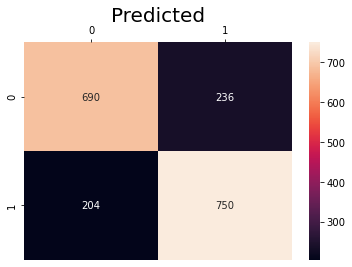

In [58]:
co_log_reg = confusion_matrix(y_true=y_test, y_pred=predictions)
ax= plt.subplot()
sns.heatmap(co_log_reg, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 

ax.xaxis.tick_top()

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       926
           1       0.76      0.79      0.77       954

    accuracy                           0.77      1880
   macro avg       0.77      0.77      0.77      1880
weighted avg       0.77      0.77      0.77      1880



# Perceptron

In [60]:
clf_Perceptron = Perceptron(max_iter=5, tol=None)
clf_Perceptron.fit(X_train, y_train)
y_pred_perceptron = clf_Perceptron.predict(X_test)
acc_perceptron = round(clf_Perceptron.score(X_train, y_train) , 2)
print(f"accuarcy_perceptron: {acc_perceptron*100}%")


accuarcy_perceptron: 71.0%


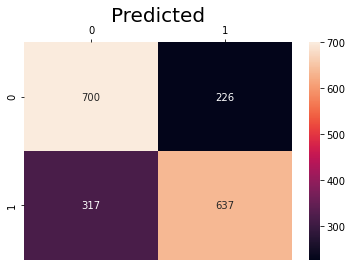

In [64]:
co_Perceptron = confusion_matrix(y_true=y_test, y_pred=y_pred_perceptron)
ax= plt.subplot()
sns.heatmap(co_Perceptron, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 

ax.xaxis.tick_top()

In [61]:
print(classification_report(y_test, y_pred_perceptron))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       926
           1       0.74      0.67      0.70       954

    accuracy                           0.71      1880
   macro avg       0.71      0.71      0.71      1880
weighted avg       0.71      0.71      0.71      1880



In [62]:
modeller_name=['ٌRf_unoptimized','RF','CART','SVC', 'Non-SVC','log_reg','Perceptron']
model_Test=[testscore_rf,testscore_rf_model,testscore_Cart,testscore_SVC,testscore_SVC_unoptimized,
            testscore_log_reg,acc_perceptron]
model_Croos=[testscore_rf,testscore_rf_model,testscore_Cart,testscore_SVC,testscore_SVC_unoptimized,
            testscore_log_reg,acc_perceptron]
#creating line1

line1= go.Scatter(
    x = modeller_name, # x axis
    y = model_Test, # y axis
    mode = "markers", #type of plot
    name = "Test Scores", # name of the plots
    marker = dict(color = 'rgba(167,150,55,0.8)'), #color + opacity
    text = modeller_name # hover text
)

#cretaing line2
line2= go.Scatter(
    x = modeller_name,
    y = model_Croos,
    mode = 'lines+markers',
    name = "Cross Valid Scores",
    marker = dict(color = 'rgba(95,26,80,0.8)'),
    text = modeller_name
) 

data = [line1,line2]

layout= dict(title= 'Comparison of Test & Cross Validation Scores',              
             xaxis= dict(title= 'ML Methods',ticklen= 5,zeroline= False)
)
fig = dict(data = data, layout = layout)
iplot(fig)



# Creation of Prediction Funtion

In [72]:
dataset = pd.read_csv(r'E:\Second Year--Aveiro\Machine Learning\Project\Mohamed\healthcare-dataset-stroke-data.csv', sep=',')
df=dataset[:750]
df = df.dropna()
y = df["stroke"] 
X = df.drop(["stroke"], axis=1)

X['smoking_status'] = X['smoking_status'].replace({'formerly smoked' or 'smokes':'smoked','never smoked' or 'Unknown':'non_smoking'})
X['smoking_status'] = [1 if i.strip() == 'smoked' else 0 for i in X.smoking_status]
X['gender'] = [1 if i.strip() == 'Male' else 0 for i in X.gender]
X['ever_married'] = [1 if i.strip() == 'Yes' else 0 for i in X.ever_married]
X['Residence_type'] = [1 if i.strip() == 'Urban' else 0 for i in X.Residence_type]

X = X.drop(["work_type"], axis=1)
X = X.drop(["id"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)



svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
crosscore_svm=accuracy_score(y_test, y_pred)

#Prediction function

def predict_stroke(patient_profile):
    users_input = pd.DataFrame(patient_profile)
    prediction = svc_tuned.predict(users_input)          
    if prediction == 0:
        print('Low Stroke Risk')
    else:
        print('High Stroke Risk')
    return 



# Artificial Patients Profiles for Prection Function

In [74]:
Patient1={'gender':[1],'age':[23],'hypertension':[0],'heart_disease':[0],'ever_married':[0],'residence_type':[1],
        'avg_glucose_level':[100.00],'bmi':[22],'smoking_status':[0]}


Patient2={'gender':[1],'age':[68],'hypertension':[1],'heart_disease':[1],'ever_married':[1],'residence_type':[1],
        'avg_glucose_level':[221.67],'bmi':[28],'smoking_status':[1]}


Patient3={'gender':[0],'age':[20],'hypertension':[0],'heart_disease':[0],'ever_married':[0],'residence_type':[1],
        'avg_glucose_level':[87],'bmi':[19],'smoking_status':[0]}

Patient4={'gender':[0],'age':[76],'hypertension':[1],'heart_disease':[1],'ever_married':[1],'residence_type':[1],
        'avg_glucose_level':[155],'bmi':[31],'smoking_status':[1]}

Patient5={'gender':[1],'age':[23],'hypertension':[1],'heart_disease':[1],'ever_married':[0],'residence_type':[0],
        'avg_glucose_level':[167],'bmi':[31],'smoking_status':[0]}


Patient6={'gender':[0],'age':[85],'hypertension':[0],'heart_disease':[0],'ever_married':[1],'residence_type':[0],
        'avg_glucose_level':[90],'bmi':[21],'smoking_status':[0]}



# Stroke Risk Prediction of Patients

In [75]:
predict_stroke(Patient1)

Low Stroke Risk


In [76]:
predict_stroke(Patient4)

High Stroke Risk


In [77]:
predict_stroke(Patient6)

High Stroke Risk
